## 1. Case Study Introduction

This case study aims to give an idea of applying Machine Learning to predict prices. As you know, regression is a technique for investigating the
relationship between independent features and an outcome. In ML, regression is used for predictive modelling. Here, you will be developing a basic machine learning regression model to predict house price based on the features provided.

### 1.1 Problem Statement

As a junior data analyst in a real estate company, It is your job to predict the sales price for each house. For each Id in the test set, you must predict
the value of the SalePrice variable. You project manager asked you to proceed with the dataset provided. In this case study, you need to develop
an ML model that predicts the house price based on the features provided in the dataset.

## 2. Data Exploration 

### 2.1 Read the Data File
- We will first read the data file which includes importing the required libraries, loading the dataset & viewing it.

In [1]:
# import the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets train & test
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# setting maximum rows & columns display size to 200 for better visibility of data 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [5]:
#viewing the first 5 rows of train df
train_df.head(5)    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#viewing the first 5 rows of test df
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 2.2 Inspect the Data Frame
- Next we will check the various attributes like shape (rows and cols) & datatypes

In [7]:
train_df.shape

(1460, 81)

In [8]:
test_df.shape

(1459, 80)

In [12]:
# check the data type of all columns
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [13]:
# check the data type of all columns
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


## 3. Data Cleaning

### 3.1 Target Log Transformation

- First we will check if the SalePrice column is skewed.

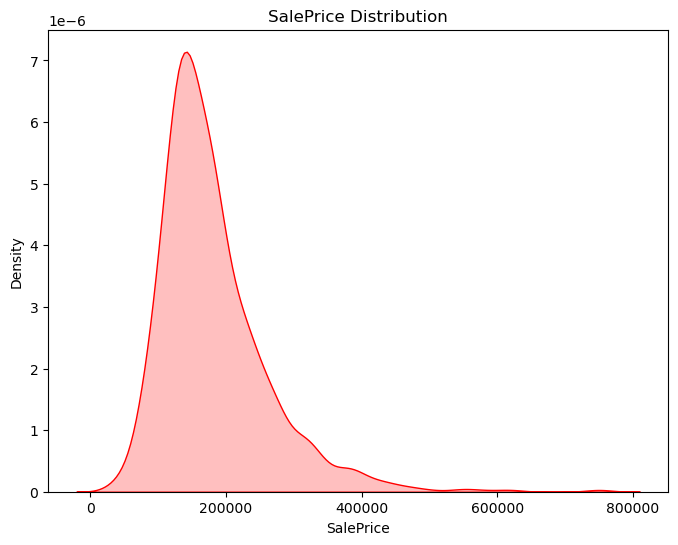

In [4]:
plt.figure(figsize=(8,6))
sns.kdeplot(data = train_df['SalePrice'], color = 'red', fill = True)
plt.title("SalePrice Distribution")
plt.show()

- The tail stretches to the right, meaning most data points are clustered on the left, with a few high values pulling the 
  distribution to the right.
- This created a right-skewed graph.

In [5]:
skewness = train_df['SalePrice'].skew().round(2)
skewness

np.float64(1.88)

- Since the skewness is more than 1, SalePrice is strongly right-skewed.
- We need to apply a log transformation on this column before training.
- This is needed because regression model assumes that residuals are normally skewed.
- Also, right-skewed targets can distort predictions and increase RMSE.

In [6]:
y = np.log1p(train_df['SalePrice']) 

### 3.2 Merging Data Sets

- Before the merging process, we will drop SalePrice from train df & save the ids from the test df for submission later.
- Then we will merge train and test df for consistent processing.
- We will not include SalePrice because all operations like missing value filling, skew correction, clipping, and one-hot encoding should be applied
  independently of the target. Including SalePrice in the merged df could interfere with these steps.

In [7]:
#drop SalePrice
train_df.drop('SalePrice', axis=1, inplace = True)

#save the ids
test_ids = test_df['Id']

train_df['is_train'] = 1
test_df['is_train'] = 0

# merge train & test df for preprocessing
merged_df = pd.concat([train_df, test_df], ignore_index=True)
merged_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


### 3.3 Missing Value Imputation

- Then we will check null values per column for the merged_df.

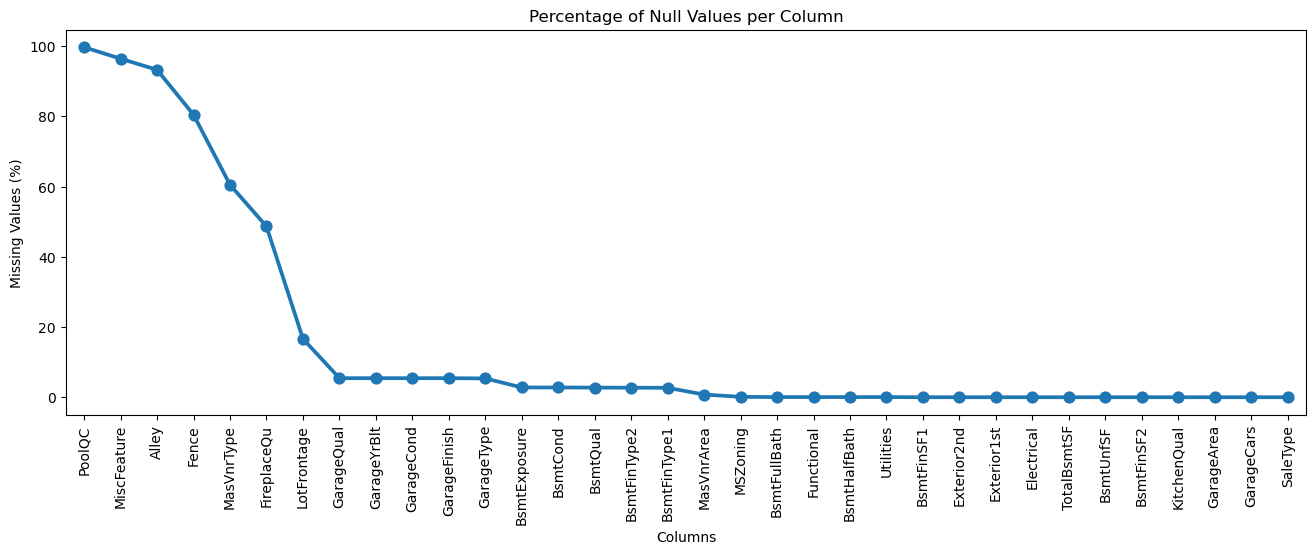

In [8]:
#check null value per col
#Count null values per column
null_count = merged_df.isnull().sum()
# get no of rows
total_count = merged_df.shape[0]
# Calculate percentage of nulls and round to 2 decimal places
null_pct = ((null_count / total_count) * 100).round(2)
#Filter only columns with missing values (makes plot cleaner)
null_pct = null_pct[null_pct > 0].sort_values(ascending=False)

#Plot using pointplot
plt.figure(figsize=(16,5))
sns.pointplot(x=null_pct.index, y=null_pct.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Null Values per Column")
plt.show()

- From the graph, we can see that there are a few columns with > 40 % null values and most of them have null values < 40 % null values.

In [9]:
# get only column names with > 50 % null values
cols_40 = null_pct[null_pct > 40].index.tolist()
cols_40

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

- Since these columns have more than 40% null values, it is wise to drop them because when there is too little real data (e.x > 50% values missing), there is a higher biasness risk.

In [10]:
merged_df.drop(cols_40, axis=1, inplace = True)

- For the remaining numerical columns with < 40% null values, we will impute with median.

In [11]:
num_cols = merged_df.select_dtypes(include=['int64','float64']).columns

for col in num_cols: 
    merged_df[col].fillna(merged_df[col].median(), inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15272\4212187617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace = True)


- For the remaining categorical columns, we will impute with mode.

In [12]:
cat_cols = merged_df.select_dtypes(include=['object']).columns

for col in cat_cols: 
    merged_df[col].fillna(merged_df[col].mode()[0], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15272\3243997487.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mode()[0], inplace = True)


In [13]:
# sanity check to see if there are remaining null values
null_col_check = merged_df.isnull().sum().sum()
null_col_check

np.int64(0)

### 3.4 Outlier Analysis

- Next we are going to detect and deal with the outliers from our dataset. Outliers are values that are unusually high or low compared to the rest of
  the data.
- We will perform IQR Rule for each column.

In [14]:
outlier_cols = merged_df.select_dtypes(include=['int64','float64']).columns

def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

# Summary
outlier_summary = []
for col in outlier_cols:
    n_out, low, up = find_outliers(train_df, col)
    pct = n_out / len(train_df) * 100
    outlier_summary.append({
        'Column': col,
        'Outliers': n_out,
        '%': round(pct, 2),
        'Lower': round(low, 2),
        'Upper': round(up, 2)
    })
    
summary_df = pd.DataFrame(outlier_summary)
print(summary_df)

           Column  Outliers      %    Lower     Upper
0              Id         0   0.00  -728.50   2189.50
1      MSSubClass       103   7.05   -55.00    145.00
2     LotFrontage        88   6.03    27.50    111.50
3         LotArea        69   4.73  1481.50  17673.50
4     OverallQual         2   0.14     2.00     10.00
5     OverallCond       125   8.56     3.50      7.50
6       YearBuilt         7   0.48  1885.00   2069.00
7    YearRemodAdd         0   0.00  1911.50   2059.50
8      MasVnrArea        96   6.58  -249.00    415.00
9      BsmtFinSF1         7   0.48 -1068.38   1780.62
10     BsmtFinSF2       167  11.44     0.00      0.00
11      BsmtUnfSF        29   1.99  -654.50   1685.50
12    TotalBsmtSF        61   4.18    42.00   2052.00
13       1stFlrSF        20   1.37   118.12   2155.12
14       2ndFlrSF         2   0.14 -1092.00   1820.00
15   LowQualFinSF        26   1.78     0.00      0.00
16      GrLivArea        31   2.12   158.62   2747.62
17   BsmtFullBath         1 

- Next, we will perform clipping to the upper and lower bounds.

In [15]:
cap_cols = merged_df.select_dtypes(include=['int64','float64']).columns

# Capping (Winsorizing) using the 1.5 * IQR fences
for col in cap_cols:
    # 1. Calculate Quartiles and IQR
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 2. Calculate the Statistical Lower and Upper Fences
    lower_calc = Q1 - 1.5 * IQR
    upper_calc = Q3 + 1.5 * IQR
    
    # 3. Determine the Final Lower Clip (Flooring) Value
    # This addresses the negative bounds you observed.
    # If the calculated lower bound is negative (e.g., -6.50), it uses 0.
    # If the calculated lower bound is positive (e.g., 39.00), it uses 39.00.
    lower_clip_final = max(0, lower_calc)
    
    # # Apply SAME bounds to both train and test
    merged_df[col] = merged_df[col].clip(lower=lower_clip_final, upper=upper_calc)

### 3.5 Feature Log Transformation
- Next we will check skewness for the features that have a predictive outcome on the SalePrice column.

In [16]:
skewness = merged_df.select_dtypes(include=['int64','float64']).skew()
skewed_features = skewness[skewness > 0.75].index
for feat in skewed_features:
    merged_df[feat] = np.log1p(merged_df[feat])   

### 3.6 Feature Engineering

#### TotalSF
- We will add up all usable living area (basement + 1st floor + 2nd floor).
- This is important as Houses with bigger total area usually sell for more & creates one strong predictor. 

In [17]:
merged_df['TotalSF'] = merged_df['TotalBsmtSF'] + merged_df['1stFlrSF'] + merged_df['2ndFlrSF']
merged_df['TotalSF']

0       1718.751101
1       2524.000000
2       1846.765039
3       1723.629363
4       2296.960348
           ...     
2914    1098.304449
2915    1098.304449
2916    2448.000000
2917    1882.000000
2918    1998.912743
Name: TotalSF, Length: 2919, dtype: float64

#### Age
- We will calculate house age at sale.
- This helps because older houses might be cheaper due to wear-and-tear while newer houses are usually more valuable.

In [18]:
merged_df['Age'] = merged_df['YrSold'] - merged_df['YearBuilt']
merged_df['Age']

0        5.0
1       31.0
2        7.0
3       91.0
4        8.0
        ... 
2914    36.0
2915    36.0
2916    46.0
2917    14.0
2918    13.0
Name: Age, Length: 2919, dtype: float64

#### Remodeled
- Binary flag: 1 if remodeled, 0 if never remodeled.
- Makes it easier for the model to differentiate remodeled vs non-remodeled homes.

In [19]:
merged_df['Remodeled'] = (merged_df['YearRemodAdd'] != merged_df['YearBuilt']).astype(int)

#### TotalBathrooms
- Combines full and half bathrooms in basement and main floors.
- Houses with more bathrooms are more functional and often sell for more.

In [20]:
merged_df['TotalBathrooms'] = merged_df['BsmtFullBath'] + 0.5*merged_df['BsmtHalfBath'] + merged_df['FullBath'] + 0.5*merged_df['HalfBath']

#### TotalPorch
- Adds all outdoor living spaces.
- Outdoor space increases home value.

In [21]:
merged_df['TotalPorch'] = (merged_df['OpenPorchSF']
                           + merged_df['EnclosedPorch'] 
                           + merged_df['3SsnPorch'] 
                           + merged_df['ScreenPorch'] 
                           + merged_df['WoodDeckSF'])

#### BsmtFinRatio
- This determines proportion of basement that is finished.
- Finished basements are more valuable than unfinished.

In [22]:
merged_df['BsmtFinRatio'] = (
    (merged_df['BsmtFinSF1'] + merged_df['BsmtFinSF2'])
    / merged_df['TotalBsmtSF'].replace(0, 1)
)

#### HasGarage, GarageAge
- HasGarage: Flag if house has a garage.
- GarageAge: How old the garage is.
- Garage presence & condition can affect price

In [23]:
merged_df['HasGarage'] = (merged_df['GarageArea'] > 0).astype(int)
merged_df['GarageAge'] = merged_df['YrSold']- merged_df['GarageYrBlt']

#### OverallScore
- Aggregates multiple quality ratings into one numeric score.
- Simplifies multiple categorical “quality” feature

In [24]:
qual_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'GarageQual']
merged_df['OverallScore'] = merged_df[qual_cols].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}).sum(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15272\1249690441.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['OverallScore'] = merged_df[qual_cols].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}).sum(axis=1)


#### HasPool, HasFireplace, HasDeck
- Converts mostly-zero numeric features into binary flags.
- Many houses don’t have pools/fireplaces/decks — zero vs non-zero is more informative than raw area/count.

In [25]:
merged_df['HasPool'] = (merged_df['PoolArea'] > 0).astype(int)
merged_df['HasFireplace'] = (merged_df['Fireplaces'] > 0).astype(int)
merged_df['HasDeck'] = (merged_df['WoodDeckSF'] > 0).astype(int)

#### SaleSeason
- Convert month of sale into season.
- Seasonal trends can influence house prices.

In [26]:
merged_df['SaleSeason'] = merged_df['MoSold'].apply(lambda x: 'Spring' if 3<=x<=5 else
                                                  'Summer' if 6<=x<=8 else
                                                  'Fall' if 9<=x<=11 else 'Winter')

### 4. Data Encoding
- We will use get_dummies function.
- This function converts categorical data into numerical "dummy" or "indicator" variables using one-hot encoding technique.

In [27]:
merged_df = pd.get_dummies(merged_df)
merged_df.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,is_train,TotalSF,Age,Remodeled,TotalBathrooms,TotalPorch,BsmtFinRatio,HasGarage,GarageAge,OverallScore,HasPool,HasFireplace,HasDeck,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleSeason_Fall,SaleSeason_Spring,SaleSeason_Summer,SaleSeason_Winter
0,1,4.110874,65.0,8450,7,5.0,2003.0,2003,5.283204,6.561031,0.0,5.017280,856.0,856.0,6.751101,0,1710.0,1.0,0.0,2.0,1,3.0,1,8,0.0,2003.0,2.0,548.0,0.000000,4.127134,0,0,0,0,0,2,2008,1,1718.751101,5.0,0,3.5,4.127134,0.007665,1,5.0,35.0,0,0,0,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,F

### 5. Correlation
- Next we will find the top 10 predictor-predictor correlations to get a better understanding of the data.

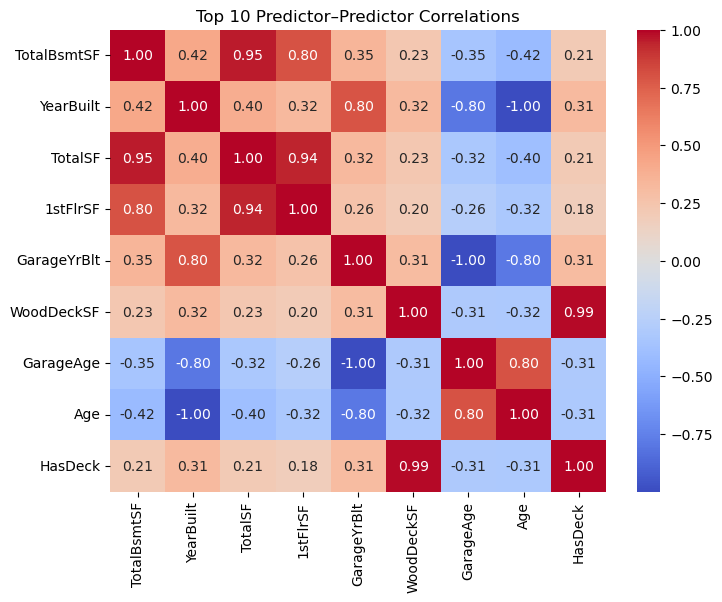

In [28]:
num_df = merged_df.select_dtypes(include=['int64', 'float64'])
# drop target and id if present
num_df = num_df.drop(columns=['Id'], errors='ignore')
corr_matrix = num_df.corr().abs()
# remove self-correlation (diagonal = 1)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

top10_pairs = (
    upper_triangle
    .stack()
    .sort_values(ascending=False)
    .head(5)
)

top_features = list(set(top10_pairs.index.get_level_values(0)) |
                    set(top10_pairs.index.get_level_values(1)))

plt.figure(figsize=(8,6))
sns.heatmap(
    num_df[top_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Top 10 Predictor–Predictor Correlations')
plt.show()

- TotalSF and TotalBsmtSF have a very strong positive correlation (0.95) – this means almost all variation in basement size directly explains variation   in total house size.
- TotalSF and 1stFlrSF have a very strong positive correlation (0.94) – first-floor size nearly perfectly predicts the overall finished living area.
- HasDeck and WoodDeckSF have an extremely strong positive correlation (0.99) – if a house has a deck, it almost always has a large wood deck area.
- Age and GarageAge have a perfect negative correlation (-1.00) – garage age is exactly the opposite of house age in every case.
- YearBuilt and GarageYrBlt have a strong positive correlation (0.80) – houses and their garages are almost always built in the same year.

### 6. Predictive Analytics
- We will use various regression algorithms such as Linear Regression, Lasso Regression & Random Forest Regression to
  predict the best house sale price.

- We will drop the ids from the merged df before we proceed to the predictive analytics.
- The ids need to be dropped since they hold no predictive power. It has no logical relationship with the target variable.

In [29]:
# drop the ids from merged_df
merged_df.drop('Id', axis=1, inplace=True)

- Then we will split back into training & test

In [30]:
#Split Back Train & Test
train_cleaned_df = merged_df[merged_df['is_train'] == 1].drop(['is_train'], axis=1)
test_cleaned_df  = merged_df[merged_df['is_train'] == 0].drop(['is_train'], axis=1)

- Then we will assign train_cleaned_df to X & split into training & validation sets

In [31]:
from sklearn.model_selection import train_test_split
X = train_cleaned_df
## Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

- Next we will perform scaling using StandardScaler.
   - Fit only training data
   - Transform validation and test data using the same scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc   = sc.transform(X_val)
test_sc    = sc.transform(test_cleaned_df)

- Then we will train our model using Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
preds_val = lr.predict(X_val_sc)
rmse_val = (np.sqrt(root_mean_squared_error(y_val, preds_val))).round(4)
print("Linear Regression RMSE on validation set:", rmse_val)

Linear Regression RMSE on validation set: 0.3635


- We will also train our model using Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0005, random_state=42)
lasso.fit(X_train_sc, y_train)
preds_val = lasso.predict(X_val_sc)
rmse_val = (np.sqrt(root_mean_squared_error(y_val, preds_val))).round(4)
print("Lasso RMSE on validation set:", rmse_val)

Lasso RMSE on validation set: 0.3595


- We will also train our model using Random Forest Regressor.

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_sc, y_train)  # RF can handle unscaled features
preds_val = rf.predict(X_val_sc)
rmse_val = (np.sqrt(root_mean_squared_error(y_val, preds_val))).round(4)
print("Random Forest RMSE on validation set:", rmse_val)

Random Forest RMSE on validation set: 0.3702


- We will use the best model using the test set to predict the house sale price.
- Since Lasso Regression gives the lowest RMSE, we will use this algorithm.

In [36]:
# Using Random Forest
final_preds = lasso.predict(test_sc)
# reverse algorithm 
final_preds = np.expm1(final_preds)  

- We will create a submission file to create a csv file to be sent for kaggle submission.

In [46]:
# Create Submission File
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': final_preds
})
submission.to_csv("regression.csv", index=False)

In [39]:
test_ids.head(4)

0    1461
1    1462
2    1463
3    1464
Name: Id, dtype: int64

In [44]:
train_df['Id'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

### 7. Conclusion

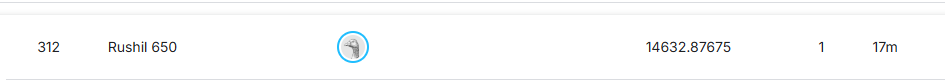
- The model achieved a public RMSE of 14,632 on the Kaggle test set, which satisfies the assignment requirement of RMSE below 15,400